# Explore here

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import seaborn as sns
from PIL import Image

In [109]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(URL)
df.to_csv('../data/raw/raw_data.csv', index = False)

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# The problem

we will try to study the behavior of the data to see which factors are relevant for the prediction of it.

### descriptive analysis

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [111]:
duplicates = df.id.duplicated().sum()
nbhd_group_values = df.neighbourhood_group.value_counts()
nbhd_values = df.neighbourhood.describe()

print(
    f'The data has {duplicates} duplicates \n\n'
    f'neighbourhood groups: \n{nbhd_group_values}\n\n'
    f'neighbourhoods: \n{nbhd_values}'
)

The data has 0 duplicates 

neighbourhood groups: 
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

neighbourhoods: 
count            48895
unique             221
top       Williamsburg
freq              3920
Name: neighbourhood, dtype: object


In [112]:
df.price.sort_values()

26841        0
25753        0
26866        0
25433        0
26259        0
         ...  
6530      9999
40433     9999
17692    10000
29238    10000
9151     10000
Name: price, Length: 48895, dtype: int64

In [113]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [114]:
df_description = df.describe()
df_description[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       38843.000000   
mean     152.720687        7.029962          23.274466           1.373221   
std      240.154170       20.510550          44.550582           1.680442   
min        0.000000        1.000000           0.000000           0.010000   
25%       69.000000        1.000000           1.000000           0.190000   
50%      106.000000        3.000000           5.000000           0.720000   
75%      175.000000        5.000000          24.000000           2.020000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

As we can see, the data does not contain duplicates and has little null values. The only columns with missing information are name, host_name, last_review and reviews_per_month.

Categorical variables are room_type, neighborhood, and neighborhood_group, some places have a price of 0 which doesn't make sense so we can just drop those.

The null values can be replaced in this case.

In [115]:
df = df[df.price > 0]
fill_dict = {
    'name':'',
    'host_name':'',
    'last_review':'',
    'reviews_per_month':0
}
df.fillna(fill_dict, inplace = True)
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Univariate analysis

we will satart by making some plots

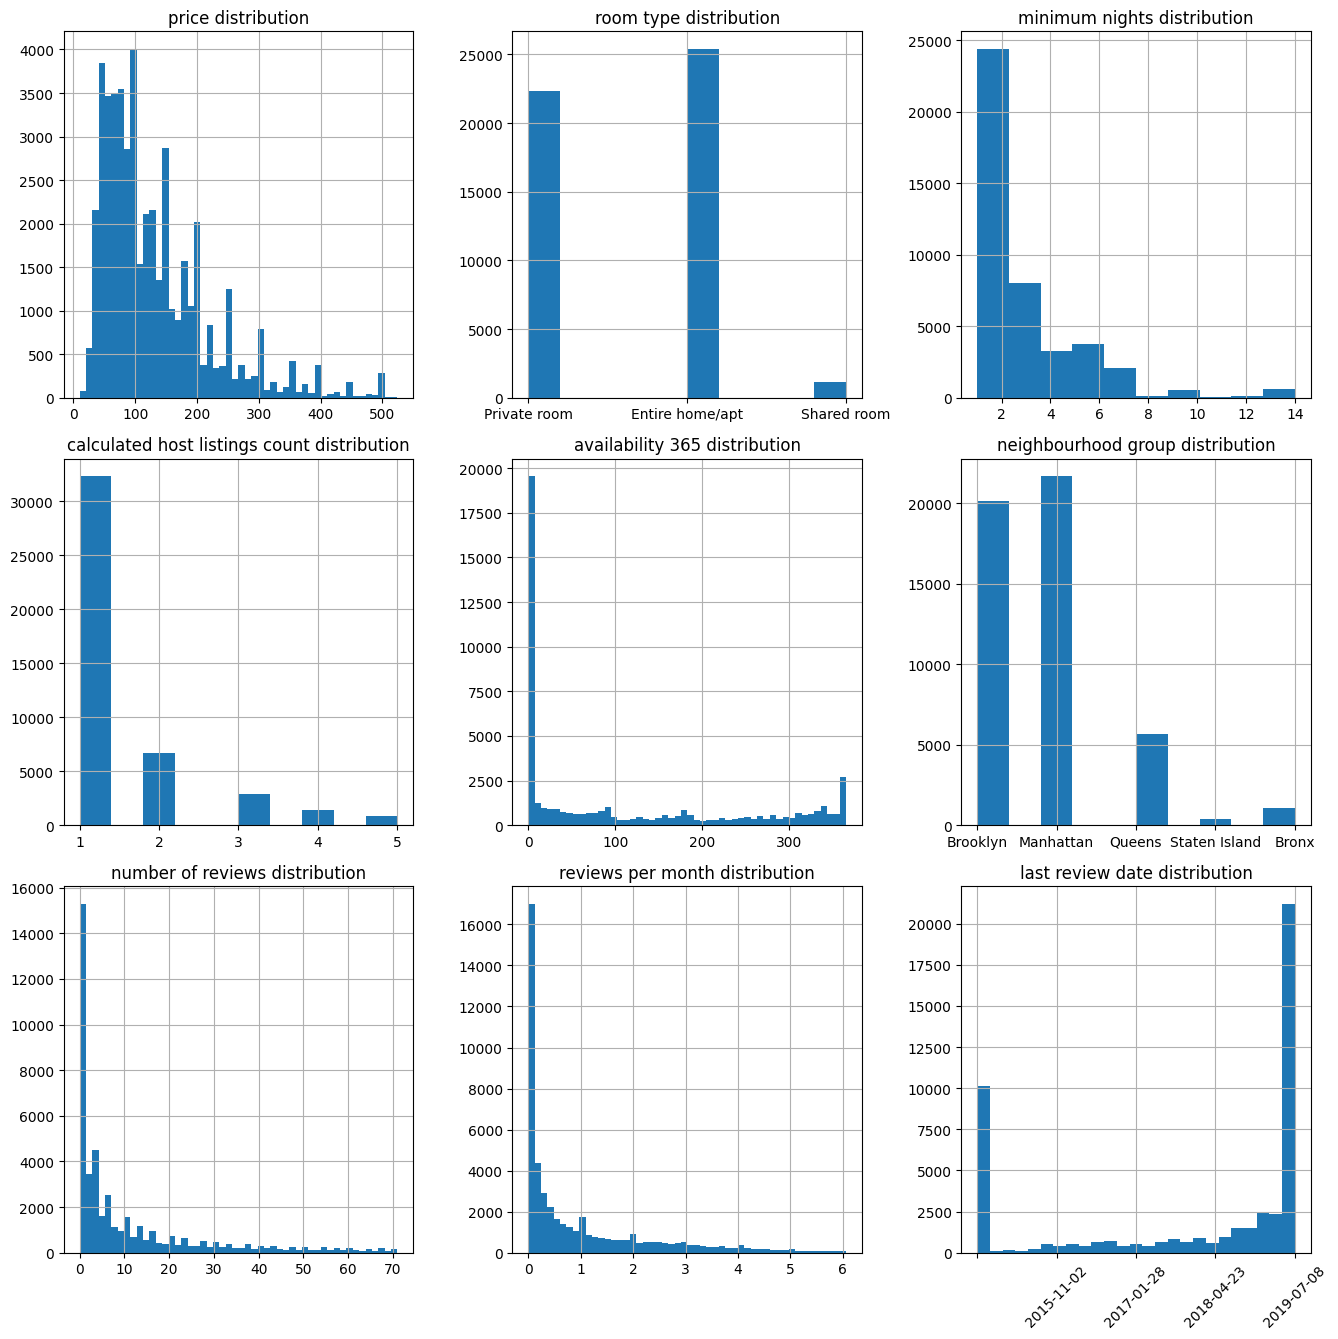

In [116]:
n = 3
m = 3
size_in = 4.5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(size_in*m,size_in*n)

columns_to_graph = df[
    [
        'price',
        'room_type',
        'minimum_nights',
        'calculated_host_listings_count',
        'availability_365',
        'neighbourhood_group',
        'number_of_reviews',
        'reviews_per_month'
    ]
]

for index, column in enumerate(columns_to_graph):
    i, j = divmod(index, m)
    column_name = column.replace('_',' ')

    if column not in ['neighbourhood', 'neighbourhood_group', 'room_type', 'last_review']:
        # since the outliers are so big for each graph, i decided to graph only values that where less than 3 times
        # as big as the biggest value in the 75% percentile.
        # also the mask only applies for numerical variables
        mask = df[column] < df_description.loc['75%',column]*3 
    else:
        # for this variables the mask is different
        mask = df.index

    if column in [
        'minimum_nights',
        'calculated_host_listings_count',
        'neighbourhood_group',
        'room_type'
        ]:
        bins = None
    else:
        bins = 50
    
    ax[i,j].hist(df.loc[mask, column], bins=bins)
    ax[i,j].set_title(f'{column_name} distribution')
    ax[i,j].grid(True)


nonas = df.last_review.dropna().sort_values()
ax[2,2].set_title('last review date distribution')
ax[2,2].hist(nonas, bins = 25)
n = len(nonas.unique())-1
ax[2,2].set_xticks(nonas.unique()[::n//4])
ax[2,2].tick_params(axis='x', labelrotation = 45)
ax[2,2].grid(True)

plt.tight_layout()
plt.show()

## First observations

- prices per night are aroun 150 USD.
- although the mean price is not that big, there are a lot of outliers with prices in the thousands of USD.
- most places are in Brooklyn or Manhattan.
- the availability_365 column has a lot of 0 values (17533), it is unclear why, but to me it looks like people listed with places with in this field 0 to avoid giving an exact number.
- there are some places that require staying times that look crazy, there is a chance some are typos but it is likely that those places are intended to be rented like a normal house. 
- the columns id, host_id, name and host_name are probably unrelated to most predictions we would like to make from this dataset.
- the hosts with the biggest number of listings appear to be companies (the Hotel Sonder and the renting agency Blueground)
- Some of the highest prices in listings might be actual prices, like in the case of luxury apartment in brooklyn (id = 13894339) but many of them look may correspond to a missinterpretation of the prices to put like the furnished room at queens(id = 7003697, it seems that the 10000 USD price in the listing is not for a night but for the 100 days minimum required stay) some others might be typos or propperties not intended for sataying as in a hotel like the film location at Brooklyn (id = 2953058)
- the most notable outliers in the number of reviews are cheap places, specially near some airport.



#### 2. Multivariate analysis


numeric - numeric

from the graph we can't see very clear linear relationships between numerical variables, but if we pay atention we will se that the prices can be higher for some specific latitudes an longitudes, also places with more review tend to have mainly lower prices aparently.

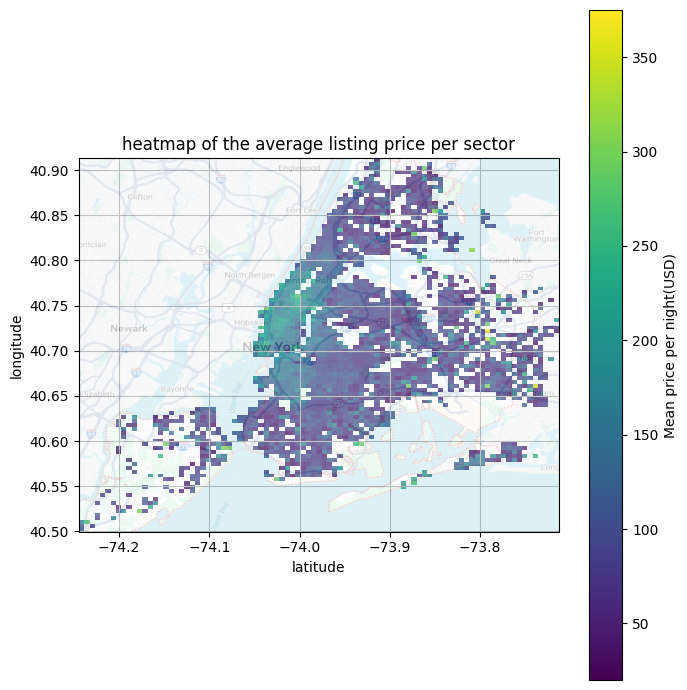

In [136]:
n = 100

img = Image.open('www.google.com-NYC.jpeg')
img = img.crop((150,100,1150,1000))

df_color = df[['price','latitude','longitude']].copy()
df_color = df[df.price < 400].copy() # dropped outliers so there is a contrast in the map

df_color['y_bin'] = pd.cut(df_color.latitude, bins=n, labels=False, include_lowest=True)
df_color['x_bin'] = pd.cut(df_color.longitude, bins=n, labels=False, include_lowest=True)

avg_price_grid = df_color.pivot_table(index='y_bin', columns='x_bin', values='price', aggfunc='mean')

x_min, x_max = df_color.longitude.min(), df_color.longitude.max()
y_min, y_max = df_color.latitude.min(), df_color.latitude.max()

fig, ax = plt.subplots(figsize=(7,7))

im = ax.imshow(avg_price_grid, origin='lower',
                extent=[x_min, x_max, y_min, y_max],
               alpha=1)
im_overlay = ax.imshow(img, origin='upper',
                       extent=[x_min, x_max, y_min, y_max],
                           alpha=0.3, zorder=2)


# 5. Add colorbar and labels
fig.colorbar(im, ax=ax, label='Mean price per night(USD)')
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_title('heatmap of the average listing price per sector')
ax.grid(True)


plt.tight_layout()
plt.show()

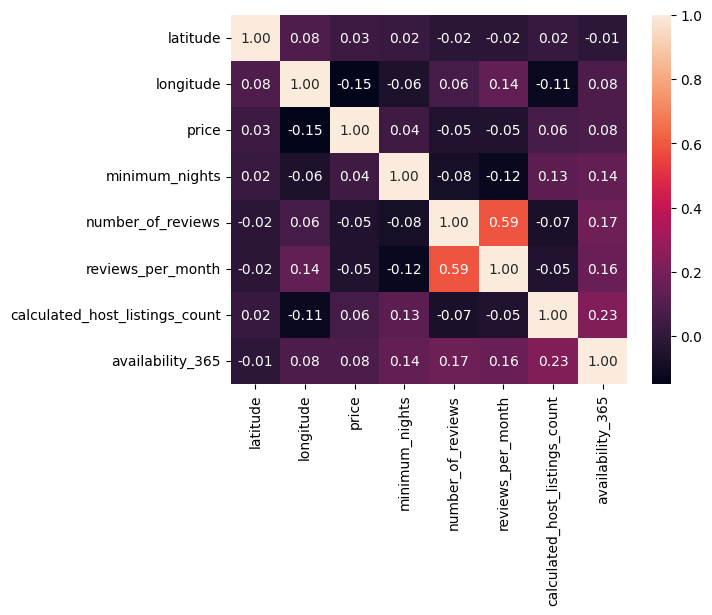

In [118]:
numeric_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df_numeric = df[numeric_cols]
sns.heatmap(df_numeric.corr(), fmt='.2f', annot = True)
plt.show()

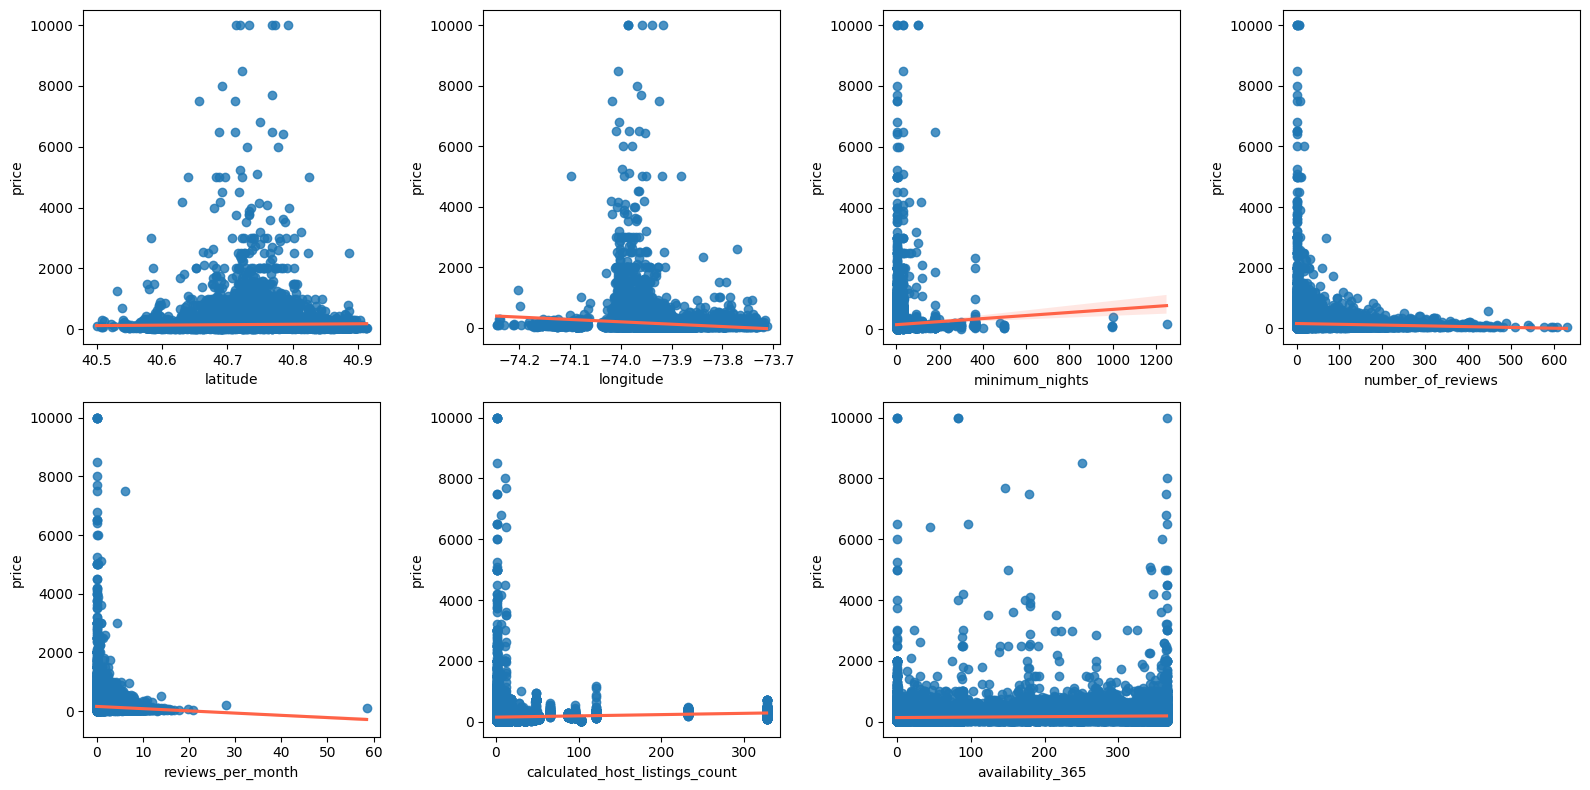

In [119]:
nrows = 2
ncols = 4
size_in = 4

fig = plt.figure(figsize=(size_in*ncols, size_in*nrows))
ax = []

cols_to_compare = [col for col in numeric_cols if col != 'price']

for i, col in enumerate(cols_to_compare): 
    current_ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.append(current_ax)
    sns.regplot(data=df, x=col, y='price' ,ax=ax[i], line_kws={'color':'tomato'})

plt.tight_layout()

categoric - categoric

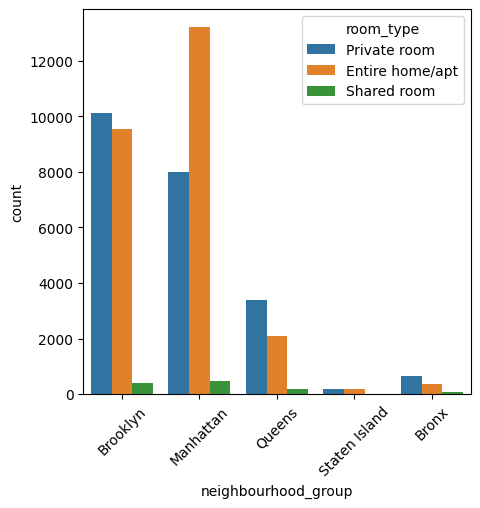

In [120]:
from itertools import combinations
from math import comb

categ_cols = ['neighbourhood_group', 'room_type']
df_categ = df[categ_cols+['neighbourhood', 'last_review']]
combinat = combinations(categ_cols,2)


ncols = comb(len(categ_cols), 2)
nrows = comb(len(categ_cols), 2)
size_inc = 5

fig = plt.figure(figsize=(size_inc*ncols, size_inc*nrows))
ax = []

for i, (x, hue) in enumerate(combinat):
    ax.append(fig.add_subplot(nrows, ncols, i+1))
    sns.countplot(data=df_categ, x=x, hue=hue, ax=ax[i])

plt.xticks(rotation=45)
sns.countplot()
plt.show()

numerical - categorical

For this step we will encode the categorical data into numerical data.

For room_type, neighbourhood and last_review we will order each group first by number of appearances of each category inside each column, for instance, most apartments are in Manhattan followed by Brooklyn so both places will get encoded to 0 and 1 respectively.

for neighbourhood group we will use one-hot-encoding since it has only five categories

In [121]:
df_categ.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

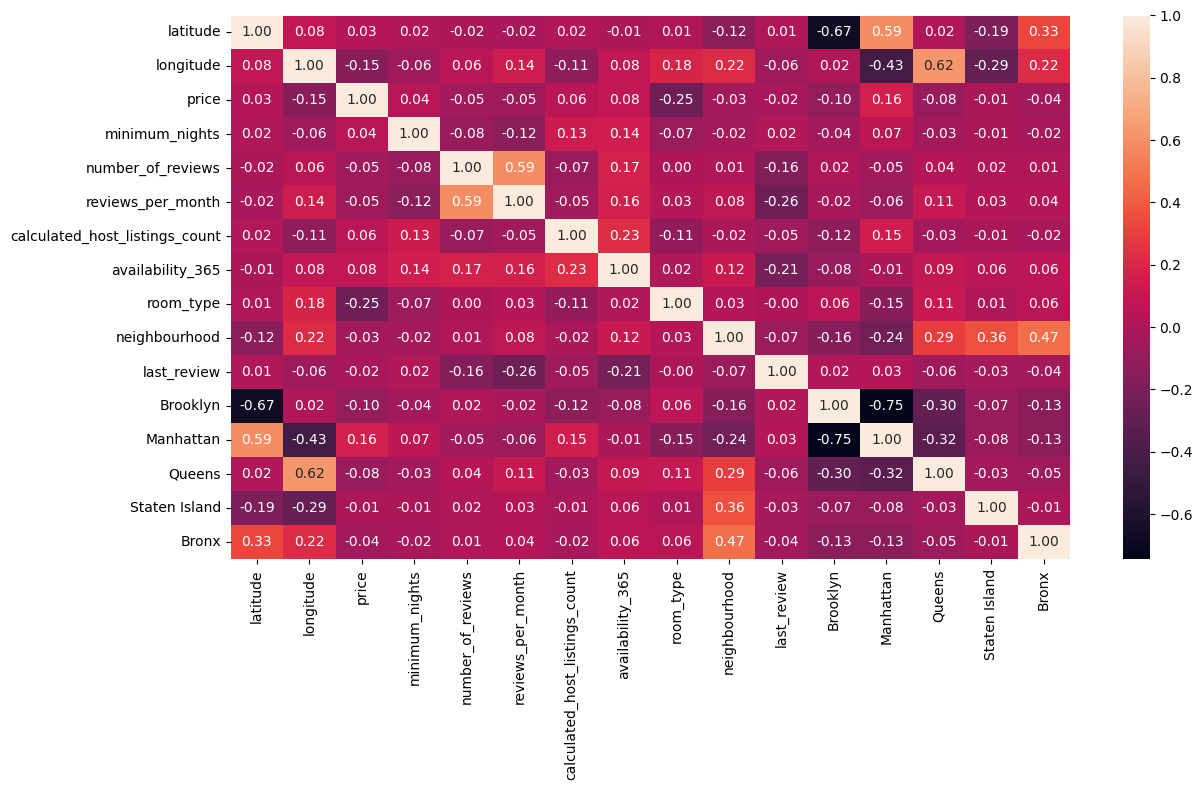

In [122]:
# the values in mappings are dictionaries with the encoding numbers for its respctive column
# the method DataFrame.value_counts() is really helpful here because it returns a Series ordered by count.  
mapings = {
    'room_type' : {type_of_room: n for n, type_of_room in enumerate(df.room_type.value_counts().index)},
    'neighbourhood' : {place: n for n, place in enumerate(df.neighbourhood.value_counts().index)},
    'last_review' : {date: n for n, date in enumerate(df.last_review.value_counts().index)}
}

df_cat_encod = df_categ.copy()

for column, encoding in mapings.items():
    df_cat_encod[column] = df_cat_encod[column].map(encoding)

neighbourhood_group_list = df_categ.neighbourhood_group.unique()
for neighbourhood_group in neighbourhood_group_list:
    df_cat_encod[neighbourhood_group] = df_cat_encod.neighbourhood_group == neighbourhood_group
df_cat_encod.drop(['neighbourhood_group'], axis=1, inplace=True)

df_cat_num = pd.concat([df_numeric,df_cat_encod], axis = 1)

fig, axis = plt.subplots(figsize = (13, 8))
sns.heatmap(df_cat_num.corr(), annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

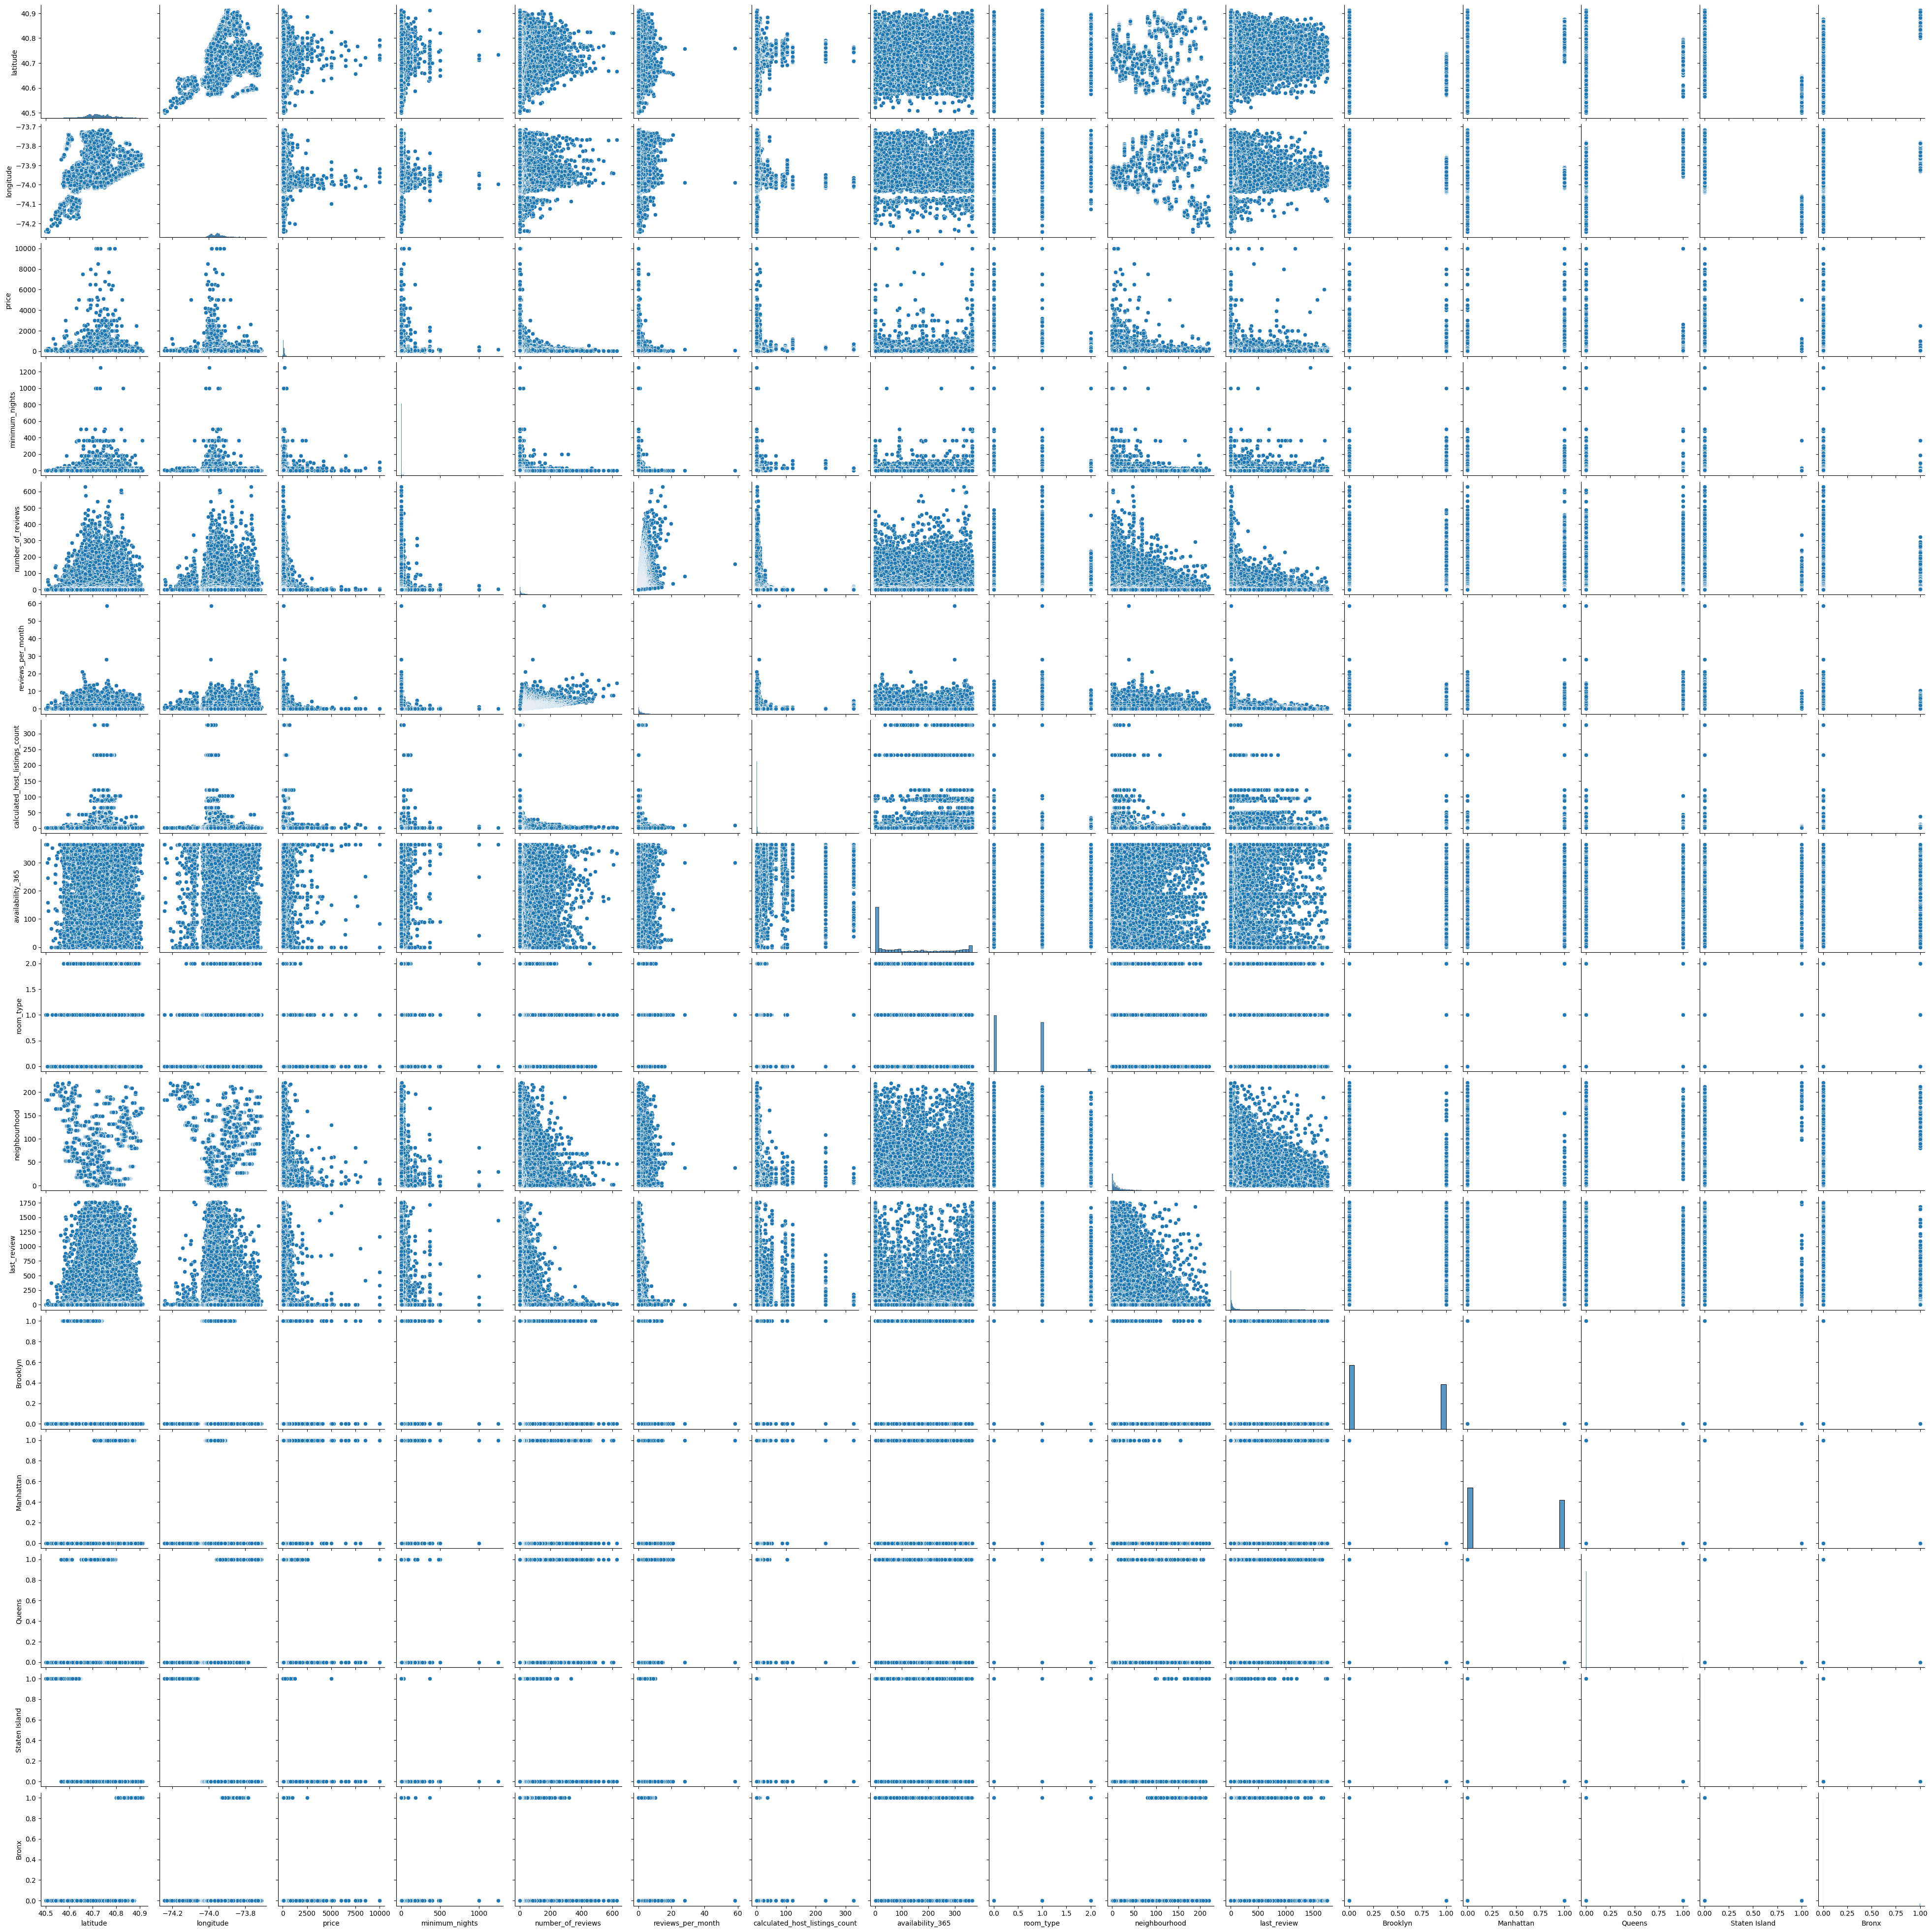

In [123]:
sns.pairplot(df_cat_num)
plt.show()

## feature engineering

Outlier analysis

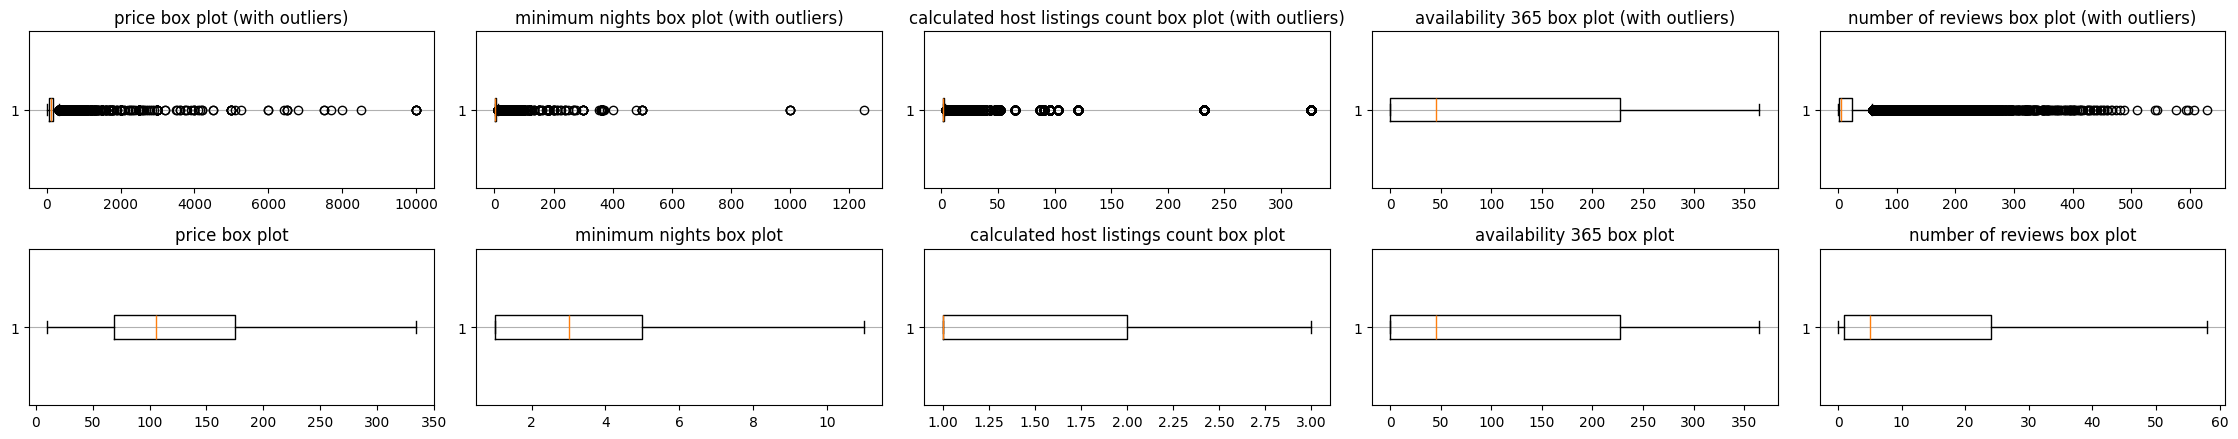

In [124]:
n = 2
m = 5
size_in = 4.5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(size_in*m,size_in*n*0.5)

columns_to_graph = df[
    [
        'price',
        # 'room_type',
        'minimum_nights',
        'calculated_host_listings_count',
        'availability_365',
        # 'neighbourhood_group',
        'number_of_reviews'
    ]
]

for i, column in enumerate(columns_to_graph):
    column_name = column.replace('_',' ')

    ax[0,i].yaxis.grid(True)
    ax[0,i].boxplot(df[column],orientation='horizontal')
    ax[0,i].set_title(f'{column_name} box plot (with outliers)')
      
    ax[1,i].yaxis.grid(True)
    ax[1,i].boxplot(df[column], showfliers=False, orientation='horizontal')
    ax[1,i].set_title(f'{column_name} box plot')

plt.tight_layout()
plt.show()

In [125]:
def iqr_limits(df:pd.DataFrame, column, r = 1.5):

    df_description = df.describe()
    column_25 = df_description.loc['25%', column]
    column_75 = df_description.loc['75%', column]
    column_iqr = column_75 - column_25
    upper_lim = column_iqr*r + column_75
    down_lim = column_25 - column_iqr*r
    return (upper_lim, down_lim)

def outlier_df(df:pd.DataFrame, column):
    upper_lim, down_lim = iqr_limits(df, column)
    column_outliers = df[(down_lim > df[column]) | (df[column] > upper_lim)]
                                                                
    column_outliers = column_outliers.sort_values(column, ascending=False)
    return column_outliers

In [126]:
outlier_df(df, 'calculated_host_listings_count')['host_name'].value_counts()

host_name
Sonder (NYC)          327
Blueground            232
Kara                  125
Kazuya                103
Sonder                 96
                     ... 
The Manhattan Club      4
Giana                   4
Anisha                  3
Kimberly                3
Adeyemi                 3
Name: count, Length: 724, dtype: int64

In [127]:
price_outliers = outlier_df(df, 'price')
price_outliers.head(5)

id                                               name   host_id  \
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                                1-BR Lincoln Center  72390391   
9151    7003697                Furnished room in Astoria apartment  20582832   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...   4382127   
6530    4737930                                 Spanish Harlem Apt   1235070   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
40433      Matt           Manhattan  Lower East Side  40.71980  -73.98566   
6530      Olson           Manhattan      East Harlem  40.79264  -73.93898   

             room_type  price  minimum_nights  number_of_reviews last_review  \
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0               
9151      Private room  10000             100                  2  2016-02-13   
40433  Entire home/apt   9999              30                  0               
6530   Entire home/apt   9999               5                  1  2015-01-02   

       reviews_per_month  calculated_host_listings_count  availability_365  
17692               0.16                               1                 0  
29238               0.00                               1                83  
9151                0.04                               1                 0  
40433               0.00                               1               365  
6530                0.02                               1                 0

In [128]:
minimum_nights = outlier_df(df, 'minimum_nights')
minimum_nights[['price','minimum_nights']].describe()

price  minimum_nights
count   6605.000000     6605.000000
mean     173.307040       34.717335
std      377.363057       46.966268
min       10.000000       12.000000
25%       65.000000       28.000000
50%      120.000000       30.000000
75%      195.000000       30.000000
max    10000.000000     1250.000000

In [129]:
number_of_reviews = outlier_df(df, 'number_of_reviews')
number_of_reviews.head(7)

id                                      name   host_id host_name  \
11759   9145202                   Room near JFK Queen Bed  47621202      Dona   
2031     903972                Great Bedroom in Manhattan   4734398        Jj   
2030     903947            Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117              Private Bedroom in Manhattan   4734398        Jj   
13495  10101135                   Room Near JFK Twin Beds  47621202      Dona   
10623   8168619         Steps away from Laguardia airport  37312959      Maya   
1879     834190  Manhattan Lux Loft.Like.Love.Lots.Look !   2369681     Carol   

      neighbourhood_group    neighbourhood  latitude  longitude     room_type  \
11759              Queens          Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan           Harlem  40.82085  -73.94025  Private room   
2030            Manhattan           Harlem  40.82124  -73.93838  Private room   
2015            Manhattan           Harlem  40.82264  -73.94041  Private room   
13495              Queens          Jamaica  40.66939  -73.76975  Private room   
10623              Queens    East Elmhurst  40.77006  -73.87683  Private room   
1879            Manhattan  Lower East Side  40.71921  -73.99116  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  2019-07-05   
2031      49               1                607  2019-06-21   
2030      49               1                597  2019-06-23   
2015      49               1                594  2019-06-15   
13495     47               1                576  2019-06-27   
10623     46               1                543  2019-07-01   
1879      99               2                540  2019-07-06   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179

In [130]:
df[df.availability_365 == 0].shape

(17530, 16)

The price outliers because checking manually some of the data I got suspicious that many listings with big prices are typos o data not put right, nontheless i only 
- Deleted places with prices over 400 to avoind deleting too many outliers that may correspond to luxury bedrooms.
- Deleted the places with minimum nighs over 100 because those are likely places for rent, not places intended to be airbnbs in the usual sense, and also some of the pople who put big prices on places with a nights minimum somewhat big, probably did it because that was the price for the minimum amount of time to stay there. The reason why I think that is because I manually checked on maps some of the locations with places over 400 USD and most of the time I didn't see big houses in privileged places, actually, many  where listed as bedrooms and not even full houses and all of them where in regular parts of the city, for those places the minimum stay often was pretty big which led me to think that the price was big because it was the price for the minimum stay.
- we can drop the host_id, host_name and , since we do not need them anymore, and do not contain usable information to predict the price for the room.

In [131]:
df = df[df.price < 400].copy()
df = df[df.minimum_nights < 100].copy()



We already found some of the basic characteristics of the data, and we can notice somithing important, there is some correlation between the position and the price, we can see that from the graphs relating coordinates and price mut it becomes more noticeable from the heatmap of average prices.

Now if we want to get information that helps us to predict the price of a listing based on the information we have, we need first to check some things we can get but are not directly reflected on the data, namely, price by neighborhood, distance to landmarks and distance to airports.
I choose those because they embed information about the position without explicitly having to measure the distance from the room listed to every possible place in the grid 

To do the distance analysis I asked gemini for the coordinates of some landmarks and airports. that i will later use to find the euclidiean distance between those places and each listing.

Also on this step I choose to drop the price outliers, since it is likely data that won't help on predicting the price because on the likelyhood of being wrong. 

Variable scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_cat_encod.drop(columns='price')
y = df_cat_encod.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler


SyntaxError: invalid syntax (157336033.py, line 4)

Now we can start to turn categorical variables into numerical variables.

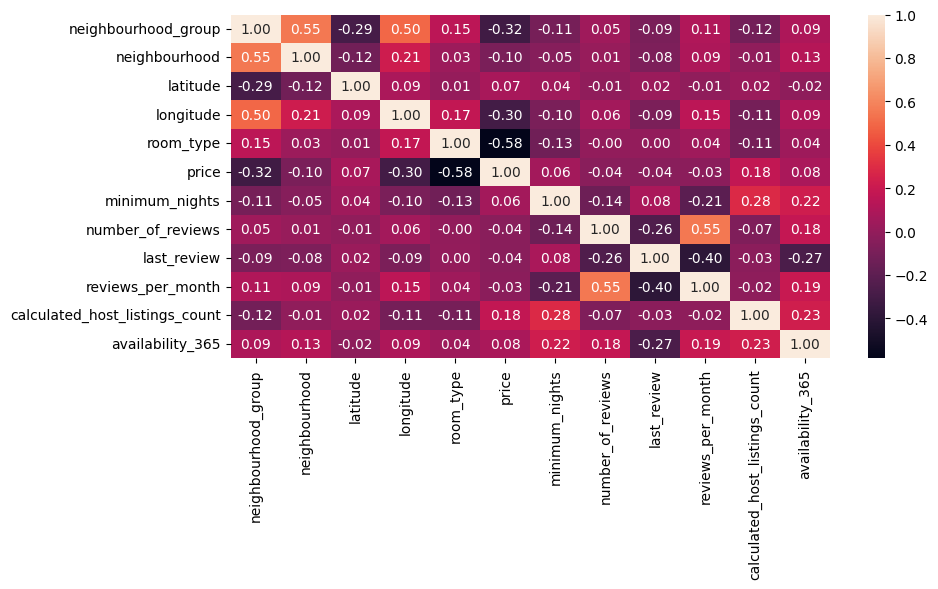

In [ ]:

dfn = df.copy()
mapings = {
    'room_type' : {type_of_room: n for n, type_of_room in enumerate(df.room_type.value_counts().index)},
    'neighbourhood' : {place: n for n, place in enumerate(df.neighbourhood.value_counts().index)},
    'last_review' : {date: n for n, date in enumerate(df.last_review.value_counts().index)},
    'neighbourhood_group' : {place: n for n, place in enumerate(df.neighbourhood_group.value_counts().index)},
}


dfn.drop(['id', 'host_id', 'name', 'host_name'], axis=1, inplace=True)

for column, dictionary in mapings.items():
    dfn[column] = dfn[column].map(dictionary)


fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(dfn.corr(), annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

In [ ]:
nyc_locations = {
    "JFK": {"latitude": 40.6413, "longitude": -73.7781},
    "LGA": {"latitude": 40.7769, "longitude": -73.8740},
    "EWR": {"latitude": 40.6895, "longitude": -74.1745},

    "Times_Square": {"latitude": 40.7589, "longitude": -73.9851},
    "Central_Park": {"latitude": 40.7851, "longitude": -73.9683}, # Central point
    "Wall_Street": {"latitude": 40.7060, "longitude": -74.0088},

    "Bridge_Park": {"latitude": 40.6992, "longitude": -73.9990},
    "Coney_Island": {"latitude": 40.5755, "longitude": -73.9817}, # Focus on the amusement area
    "Corona_Park": {"latitude": 40.7460, "longitude": -73.8470}, # Near Unisphere
    "Astoria_Park": {"latitude": 40.7797, "longitude": -73.9231} # Waterfront park with city views
}

distance_df = df[['price','neighbourhood_group', 'neighbourhood', 'latitude','longitude']].copy()

for location, coordinates in nyc_locations.items():
    landmark_latitude = coordinates['latitude']
    landmark_longitude = coordinates['longitude']
    column_distance_name = location + '_distance'

    latitude_diff = (distance_df.latitude - landmark_latitude)**2
    longitude_diff = (distance_df.longitude - landmark_longitude)**2

    distance_df[column_distance_name] = (latitude_diff + longitude_diff)**(1/2)

distance_df['Manhattan'] = distance_df.neighbourhood_group == 'Manhattan'
distance_df['Brooklyn'] = distance_df.neighbourhood_group == 'Brooklyn'
distance_df['Bronx'] = distance_df.neighbourhood_group == 'Bronx'
distance_df['Queens'] = distance_df.neighbourhood_group == 'Queens'
distance_df['Staten_Island'] = distance_df.neighbourhood_group == 'Staten Island'

distance_columns = list(filter(lambda name: 'distance' in name, distance_df.columns))

distance_df['closest_landmark'] = distance_df[distance_columns].min(axis=1)

distance_df

price neighbourhood_group       neighbourhood  latitude  longitude  \
0        149            Brooklyn          Kensington  40.64749  -73.97237   
1        225           Manhattan             Midtown  40.75362  -73.98377   
2        150           Manhattan              Harlem  40.80902  -73.94190   
3         89            Brooklyn        Clinton Hill  40.68514  -73.95976   
4         80           Manhattan         East Harlem  40.79851  -73.94399   
...      ...                 ...                 ...       ...        ...   
48890     70            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891     40            Brooklyn            Bushwick  40.70184  -73.93317   
48892    115           Manhattan              Harlem  40.81475  -73.94867   
48893     55           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894     90           Manhattan      Hell's Kitchen  40.76404  -73.98933   

       JFK_distance  LGA_distance  EWR_distance  Times_Square_distance  \
0          0.194369      0.162553      0.206449               0.112135   
1          0.234341      0.112211      0.201220               0.005445   
2          0.234436      0.075114      0.261511               0.066168   
3          0.186875      0.125597      0.214784               0.077991   
4          0.228549      0.073250      0.254986               0.057088   
...             ...           ...           ...                    ...   
48890      0.175837      0.124278      0.224818               0.087720   
48891      0.166469      0.095578      0.241645               0.077153   
48892      0.243267      0.083715      0.258238               0.066681   
48893      0.242657      0.118714      0.195585               0.006178   
48894      0.244301      0.116045      0.199610               0.006657   

       Central_Park_distance  ...  Bridge_Park_distance  \
0                   0.137670  ...              0.058164   
1                   0.035076  ...              0.056511   
2                   0.035625  ...              0.123777   
3                   0.100324  ...              0.041683   
4                   0.027763  ...              0.113528   
...                      ...  ...                   ...   
48890               0.108138  ...              0.053227   
48891               0.090368  ...              0.065883   
48892               0.035559  ...              0.126035   
48893               0.035804  ...              0.058840   
48894               0.029762  ...              0.065557   

       Coney_Island_distance  Corona_Park_distance  Astoria_Park_distance  \
0                   0.072592              0.159442               0.141092   
1                   0.178132              0.136982               0.066038   
2                   0.236887              0.113919               0.034830   
3                   0.111814              0.128136               0.101418   
4                   0.226176              0.110292               0.028111   
...                      ...                   ...                    ...   
48890               0.107811              0.123089               0.104672   
48891               0.135340              0.096827               0.078508   
48892               0.241519              0.122733               0.043386   
48893               0.182254              0.144579               0.071548   
48894               0.188694              0.143469               0.068056   

       Manhattan  Brooklyn  Bronx  Queens  Staten_Island  closest_landmark  
0          False      True  False   False          False          0.058164  
1           True     False  False   False          False          0.005445  
2           True     False  False   False          False          0.034830  
3          False      True  False   False          False          0.041683  
4           True     False  False   False          False          0.027763  
...          ...       ...    ...     ...            ...               ...  
48890      False    

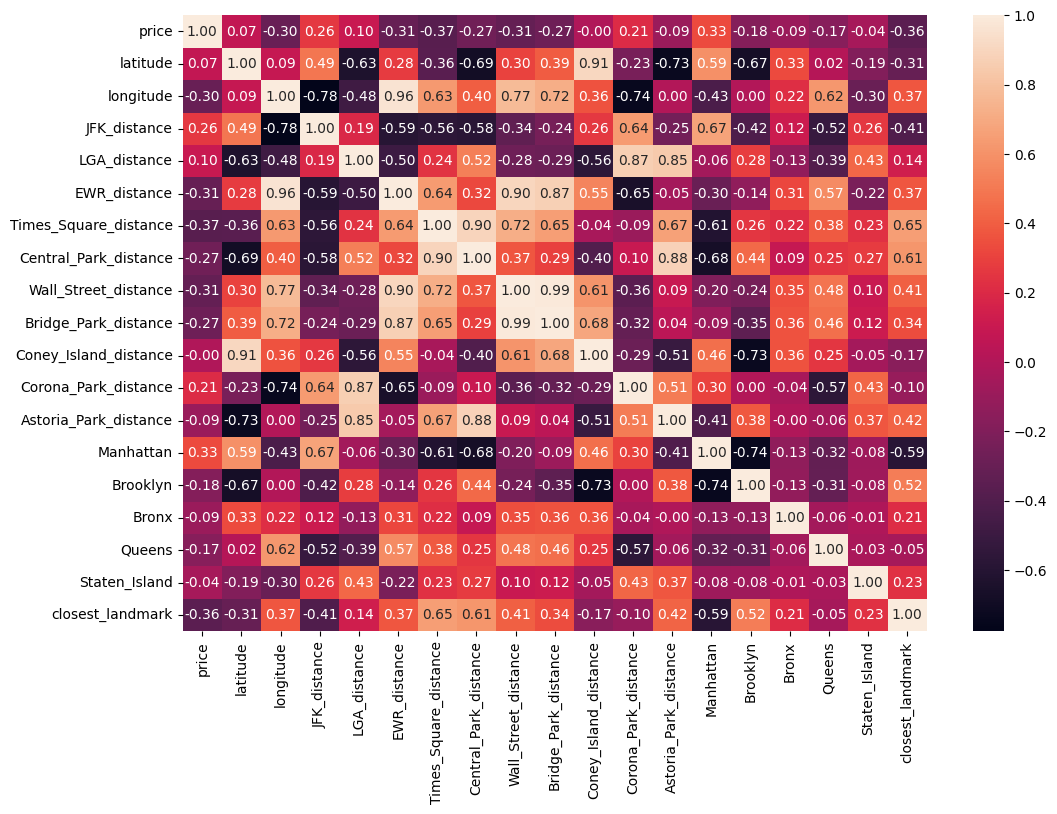

In [ ]:
fig, axis = plt.subplots(figsize = (12, 8))
numeric_columns = list(filter(lambda name: 'neighbourhood' not in name, distance_df.columns))
sns.heatmap(distance_df[numeric_columns].corr(), annot = True, fmt = ".2f")
plt.tight_layout
plt.show()


## feature selection

the rule im going to follow for the feature selection is the next: if the magnitude of the correlation coefficient is greater or equal than 0.1 then I will select the feature. 
features related to distance (distance to):
- JFK (Airport).
- EWR (Airport).
- LGA (Airport).
- Times square.
- Central Park.
- Wall St.
- Bridge Park.
- Corona Park.

features related to the neighborhood and position:
- is in Manhattan
- is in Brooklyn
- is in Bronx
- is in Queens
- longitude

other:
- Room type
- host listing count
- neighborhood
- neighborhood group

Although neighborhood and neighborhood group appear to be variables related to the location, the numbers assigned to its values were actually based on how many listings where on each neighborhood and group, so technically the number assigned to each possible value encodes the popularity ranking for each one of thos two columns, this is, manhattan was assigned 1 because its the most popular neighborhood group, Brooklyn 2 because it was the second, etc.

so this is the final dataframe:


In [ ]:

distance_features = distance_df[
    [
        'JFK_distance',
        'LGA_distance',
        'EWR_distance',
        'Times_Square_distance',
        'Central_Park_distance',
        'Wall_Street_distance',
        'Bridge_Park_distance',
        'Corona_Park_distance'
    ]
]

position_features = distance_df[
    [        
        'Manhattan',
        'Brooklyn',
        'Bronx',
        'Queens',
        'longitude'
    ]
]

other_features = dfn[
    [
    'room_type',
    'calculated_host_listings_count',
    'neighbourhood',
    'neighbourhood_group'
    ]
]

final_df = pd.concat([distance_features, position_features, other_features], axis=1)
final_df


JFK_distance  LGA_distance  EWR_distance  Times_Square_distance  \
0          0.194369      0.162553      0.206449               0.112135   
1          0.234341      0.112211      0.201220               0.005445   
2          0.234436      0.075114      0.261511               0.066168   
3          0.186875      0.125597      0.214784               0.077991   
4          0.228549      0.073250      0.254986               0.057088   
...             ...           ...           ...                    ...   
48890      0.175837      0.124278      0.224818               0.087720   
48891      0.166469      0.095578      0.241645               0.077153   
48892      0.243267      0.083715      0.258238               0.066681   
48893      0.242657      0.118714      0.195585               0.006178   
48894      0.244301      0.116045      0.199610               0.006657   

       Central_Park_distance  Wall_Street_distance  Bridge_Park_distance  \
0                   0.137670              0.068924              0.058164   
1                   0.035076              0.053797              0.056511   
2                   0.035625              0.122836              0.123777   
3                   0.100324              0.053292              0.041683   
4                   0.027763              0.112953              0.113528   
...                      ...                   ...                   ...   
48890               0.108138              0.064946              0.053227   
48891               0.090368              0.075744              0.065883   
48892               0.035559              0.124267              0.126035   
48893               0.035804              0.054460              0.058840   
48894               0.029762              0.061219              0.065557   

       Corona_Park_distance  Manhattan  Brooklyn  Bronx  Queens  longitude  \
0                  0.159442      False      True  False   False  -73.97237   
1                  0.136982       True     False  False   False  -73.98377   
2                  0.113919       True     False  False   False  -73.94190   
3                  0.128136      False      True  False   False  -73.95976   
4                  0.110292       True     False  False   False  -73.94399   
...                     ...        ...       ...    ...     ...        ...   
48890              0.123089      False      True  False   False  -73.94995   
48891              0.096827      False      True  False   False  -73.93317   
48892              0.122733       True     False  False   False  -73.94867   
48893              0.144579       True     False  False   False  -73.99112   
48894              0.143469       True     False  False   False  -73.98933   

       room_type  calculated_host_listings_count  neighbourhood  \
0              1                               6             50   
1              0                               2              9   
2              1                               1              2   
3              0                               1             19   
4              0                               1             10   
...          ...                             ...            ...   
48890          1                               2              1   
48891          1                               2              3   
48892          0                               1              2   
48893          2                               6              5   
48894          1                               1              5   

       neighbourhood_group  
0                        1  
1                        0  
2                        0  
3                        1  
4                        0  
...                    ...  
48890                    1  
48891                    1  
48892                    0  
48893                    0  
48894                    0  

[46725 rows x 17 columns]